# TRATAMIENTO DE DATOS.

In [3]:
import numpy as np
import pandas as pd

#----->Gráficos

import matplotlib.pyplot as plt

#----->Preprocesado y modelado

from sklearn.decomposition import PCA       #----->llamado de bibliotecas
from sklearn.preprocessing import StandardScaler   #----->se encarga de cambiar la escala de cada una de las observaciones
from sklearn.pipeline import make_pipeline       #----->se encargará de revisar el proceso completo de aplicación de PCA
from numpy import linalg as LA                   #----->cálculo de operaciones de álgebra lineal 

#-------> error se resolvió instalando  ---->   pip install -U scikit-learn

# Generar dataframe para los datos que se muestran

In [4]:
df = pd.DataFrame(np.array([[7, 6.5, 9.2, 8.6, 8],
                            [7.5, 9.4, 7.3, 7, 7],
                            [7.6, 9.2, 8, 8, 7.5],
                            [5, 6.5, 6.5, 7, 9],
                            [6, 6 , 7.8, 8.9, 7.3],
                            [7.8, 9.6, 7.7, 8, 6.5],
                            [6.3, 6.4, 8.2, 9, 7.2],
                            [7.9, 9.7, 7.5, 8, 6],
                            [6, 6, 6.5, 5.5, 8.7],
                            [6.8, 7.2, 8.7, 9, 7]]),
            index = ['Lucia','Pedro','Ines','Luis','Andres','Ana','Carlos','Jose','Sonia','Maria'],
          columns = ['Matematicas','Ciencias','Español','Historia','EdFisica'])
df

,Matematicas,Ciencias,Español,Historia,EdFisica
Lucia,7.0,6.5,9.2,8.6,8.0
Pedro,7.5,9.4,7.3,7.0,7.0
Ines,7.6,9.2,8.0,8.0,7.5
Luis,5.0,6.5,6.5,7.0,9.0
Andres,6.0,6.0,7.8,8.9,7.3
Ana,7.8,9.6,7.7,8.0,6.5
Carlos,6.3,6.4,8.2,9.0,7.2
Jose,7.9,9.7,7.5,8.0,6.0
Sonia,6.0,6.0,6.5,5.5,8.7
Maria,6.8,7.2,8.7,9.0,7.0


# Vamos ahora a revisar el número de renglones de la base de datos

# Se lo vamos a asignar a una variable, para después a través de ella poder

# calcular las correlaciones que existen entre cada una de las columnas que 

# estamos observando.

# -----------------------------------------------------------------------------------------

# Determinar el número de renglones de la base de datos.

In [5]:
index = df.index
renglones = len(index)
renglones

10

# Estandarización de las variables de nuestra base de datos

In [ ]:
---La idea es que para cada columna seamos capaces de transformarla en una escala común sin importar de que columna 
   hablemos. Esto se hace restándole a cada elemento de cada columna la media por columna y dividirla entre su 
   desviación estándar.

In [6]:
df2 = StandardScaler().fit_transform(df)     #------> aplica una transformación a la base de datos original
df2

array([[ 0.23263076, -0.7529862 ,  1.78848525,  0.65792263,  0.65858084],
       [ 0.78651352,  1.14584856, -0.53899555, -0.84590053, -0.47690337],
       [ 0.89729007,  1.01489444,  0.31849737,  0.09398895,  0.09083874],
       [-1.98290027, -0.7529862 , -1.51898747, -0.84590053,  1.79406505],
       [-0.87513476, -1.0803715 ,  0.07349939,  0.93988948, -0.13625811],
       [ 1.11884317,  1.27680268, -0.0489996 ,  0.09398895, -1.04464547],
       [-0.5428051 , -0.81846326,  0.56349535,  1.03387842, -0.24980653],
       [ 1.22961972,  1.34227974, -0.29399757,  0.09398895, -1.61238758],
       [-0.87513476, -1.0803715 , -1.51898747, -2.25573474,  1.45341979],
       [ 0.01107766, -0.29464677,  1.1759903 ,  1.03387842, -0.47690337]])

# Calcular la matriz de correlaciones para la matriz transformada

In [7]:
A = (1/renglones) * np.dot(df2.T, df2)
A

array([[ 1.        ,  0.85407878,  0.38457424,  0.20719425, -0.78716269],
       [ 0.85407878,  1.        , -0.02005218, -0.02153942, -0.68772056],
       [ 0.38457424, -0.02005218,  1.        ,  0.82091619, -0.36554342],
       [ 0.20719425, -0.02153942,  0.82091619,  1.        , -0.50800132],
       [-0.78716269, -0.68772056, -0.36554342, -0.50800132,  1.        ]])

In [ ]:
--Esto es parte de lo que hace el análisis de componentes principales, identificar donde se encuentran las coincidencias
  y a partir de ahí empezar el análisis respectivo.

In [ ]:
--Lo que sigue es el cálculo de lo que se refiere al estudio de pca, de las 5 columnas en la matriz es transformarla en una
nueva escala que podamos observar, cambiando la orientación.

# Entrenamiento del modelo PCA con escalado de los datos

In [8]:
pca_pipe = make_pipeline(StandardScaler(),PCA())   #---> accion de hacer un pipeline 
pca_pipe.fit(df)         #--->aplicar componentes principales a la bd original. Hace la estandarización.


# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

print("Eigenvalores: ")
results = LA.eigvals(A)                 #------> definir una variable results que aplique el módulo de álgebra lineal a los
                                        #------> eigenvalores de la matriz A que se había obtenido
print(results)

Eigenvalores: 
[2.89324967 1.62865042 0.34659605 0.00889139 0.12261246]


In [ ]:
--Todos estos comandos son propios de la librería que estamos utilizando.
--El objetivo principal es calcular lo que son los valores de la matriz transformada que nos van a devolver el porcentaje
  de explicación de la varianza que tienen los nuevos 5 componentes que vamos a generar. Y estos componenetes están 
  expresados a manera de eigenvalores ó los indicadores de explicación de varianza.

In [ ]:
Eigenvalores: 
[2.89324967 1.62865042 0.34659605 0.00889139 0.12261246]

explicacion:
    estos indicadores que son 5, nos indican el peso que tiene cada nueva variable que vamos a generar a partir de la 5 
    sobre la lista final de mis variables originales al transformarlas la que tiene mayor peso es la primera y la segunda.
    De manera proporcional nosotros podríamos determinar el porcentaje de varianza explicada por cada nuevo componente.

# Porcentaje de la varianza explicada por cada nuevo componente

In [9]:
print("Porcentaje de varianza explicada por componente")
print(modelo_pca.explained_variance_ratio_)

Porcentaje de varianza explicada por componente
[0.57864993 0.32573008 0.06931921 0.02452249 0.00177828]


In [ ]:
estos resultados los pudimos también haber calculado de la parte superior
0.57864993 viene de dividir 2.89324967 entre la suma de 2.89324967 + 1.62865042 y así sucesivamente hasta llegar a 
0.12261246  

# Cálculo de eigenvectores 

In [10]:
print("Eigenvectores (por renglón): ")
pd.DataFrame(data = modelo_pca.components_,
          columns = df.columns, 
            index = ['PC1','PC2', 'PC3', 'PC4', 'PC5'])

Eigenvectores (por renglón): 


,Matematicas,Ciencias,Español,Historia,EdFisica
PC1,-0.526644,-0.424936,-0.359147,-0.352697,0.537302
PC2,-0.270496,-0.508072,0.562082,0.586490,0.093746
PC3,0.438201,0.040495,0.562276,-0.394180,0.578626
PC4,-0.261218,0.673627,-0.070086,0.446645,0.523056
PC5,-0.623878,0.325390,0.483747,-0.420433,-0.306794


# Proyecciones de los componentes.

In [11]:
proyecciones = np.dot(modelo_pca.components_, df2.T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1','PC2', 'PC3', 'PC4', 'PC5'])
proyecciones = proyecciones.transpose().set_index(df.index)
proyecciones

,PC1,PC2,PC3,PC4,PC5
Lucia,-0.323063,1.772525,1.198801,-0.055015,-0.003633
Pedro,-0.665441,-1.638702,0.145476,-0.023065,0.123377
Ines,-1.002547,-0.515692,0.628888,0.516444,-0.142876
Luis,3.172095,-0.262782,-0.381960,0.677777,0.062504
Andres,0.488868,1.365402,-0.835236,-0.155792,-0.123367
Ana,-1.708633,-1.021700,-0.127077,0.066833,-0.025292
Carlos,-0.067586,1.462336,-0.506240,-0.117928,-0.013124
Jose,-2.011855,-1.275865,-0.542150,-0.197787,-0.017434
Sonia,3.042030,-1.254881,0.448829,-0.639999,-0.037885
Maria,-0.923869,1.369359,-0.029330,-0.071467,0.177730


In [ ]:
lo que acabamos de hacer es representar a nuestra base original en un nuevo espacio de 5 variables, donde las relaciones
que tenían entre ellas siguen siendo las mismas, lógicamente de manera proporcional y de acuerdo a una matriz de 
correlación. Es como si estuviéramos volteando la vista en las observaciones desde una perspectiva diferente 
matemáticamente hablando. Vamos a ver esto en una gráfica si lo manifestamos en un diagrama de dispersión. Vamos a hacer la
gráfica y vamos a ver si las observaciones se agrupan de alguna manera en concreto al momento de tener una perspectiva como 
aparecerán agrupadas, si existe algún tipo de manera de colocarlas. Y vamos a ver lo que conoce como el mapa de las 
observaciones, de forma tal que veamos elementos que tienen cosas en común. Se busca que se agrupen las observaciones por 
correlaciones que éstas puedan llegar a tener.

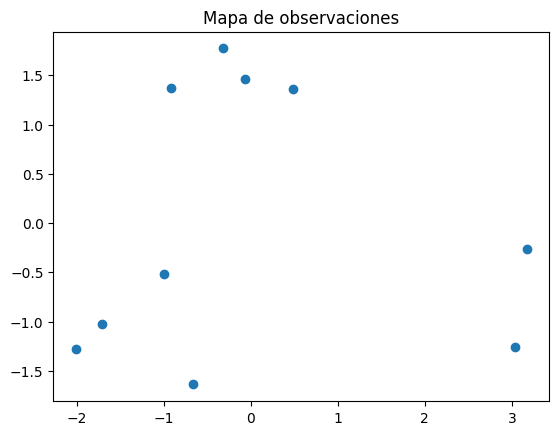

In [12]:
x = proyecciones.iloc[:,0]   #------> todas las observaciones sobre la columna cero
y = proyecciones.iloc[:,1]   #------> todas las observaciones sobre la columna uno 
z = df.index                 #------> lista de todos los nombres que tenemos en nuestra base de datos 
                             #--->(index se asocia a los nombres de cada renglon)
#---> para poder graficar vamos a convertir en un arreglo.

x = x.to_numpy()
y = y.to_numpy()

#---> Definir nuestra subgráfica

fig, ax = plt.subplots()    #--->definir 2 elementos, un elemento de figura y un elemento de eje que se va a usar para
                            #--->crear subgráficas con el comando plt.subplots()
ax.set_title("Mapa de observaciones")    #---> título de la gráfica
ax.scatter(x,y)                          #--->Realizamos la gráfica

# Asociar los nombres a la gráfica (primera y segunda columna).

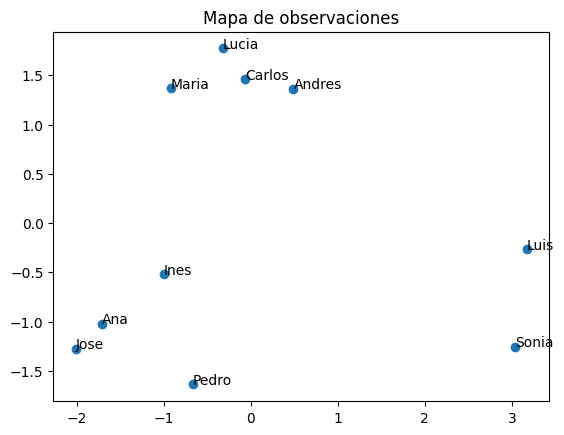

In [13]:
x = proyecciones.iloc[:,0]   #------> todas las observaciones sobre la columna cero
y = proyecciones.iloc[:,1]   #------> todas las observaciones sobre la columna uno 
z = df.index                 #------> lista de todos los nombres que tenemos en nuestra base de datos 
                             #--->(index se asocia a los nombres de cada renglon)
#---> para poder graficar vamos a convertir en un arreglo.

x = x.to_numpy()
y = y.to_numpy()

#---> Definir nuestra subgráfica

fig, ax = plt.subplots()    #--->definir 2 elementos, un elemento de figura y un elemento de eje que se va a usar para
                            #--->crear subgráficas con el comando plt.subplots()
ax.set_title("Mapa de observaciones")    #---> título de la gráfica
ax.scatter(x,y)  

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]))
    
#--> para todo i (donde i se mueve de 1 a 10), colocar el texto que corresponda a la lista que aparezca en z  y la vas a
#--> colocar en cada punto x y y sobre la gráfica que ya habíamos generado.
    

In [14]:
componentes_2 = pd.DataFrame(data = modelo_pca.components_,
                             columns = df.columns,
                             index = ['PC1','PC2', 'PC3', 'PC4', 'PC5'])
componentes_2 = componentes_2.iloc[0:2, :]   #--->del 0 al 2 (sin tomar en cuenta el 2) y para todas las columnas.
componentes_2

,Matematicas,Ciencias,Español,Historia,EdFisica
PC1,-0.526644,-0.424936,-0.359147,-0.352697,0.537302
PC2,-0.270496,-0.508072,0.562082,0.586490,0.093746


In [16]:
componentes_2 = pd.DataFrame(data = modelo_pca.components_,
                          columns = df.columns,
                            index = ['PC1','PC2', 'PC3', 'PC4', 'PC5'])
componentes_2 = componentes_2.iloc[0:2, :]
componentes_2 = componentes_2.T
componentes_2

,PC1,PC2
Matematicas,-0.526644,-0.270496
Ciencias,-0.424936,-0.508072
Español,-0.359147,0.562082
Historia,-0.352697,0.586490
EdFisica,0.537302,0.093746


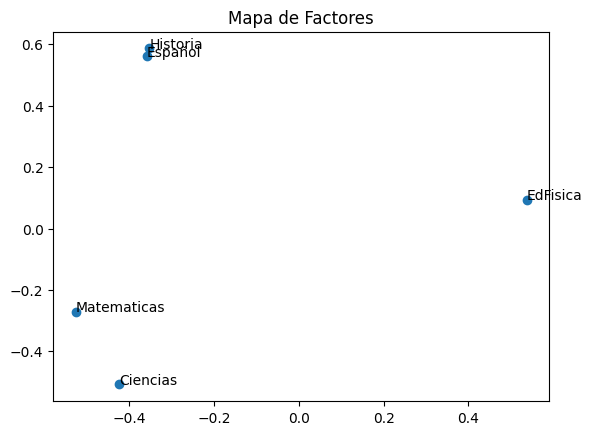

In [17]:
x = componentes_2.iloc[:,0]   
y = componentes_2.iloc[:,1]   
z = componentes_2.index                 
                             

x = x.to_numpy()
y = y.to_numpy()


fig, ax = plt.subplots()    
                            
ax.set_title("Mapa de Factores")    
ax.scatter(x,y)  

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]))

# Procedimiento para obtener la matriz estandarizada original a partir de los 
eigenvalores y los valores proyectados de las observaciones.

In [18]:
original = np.dot(modelo_pca.components_.T, proyecciones.T)
original = original.T
print(original)

[[ 0.23263076 -0.7529862   1.78848525  0.65792263  0.65858084]
 [ 0.78651352  1.14584856 -0.53899555 -0.84590053 -0.47690337]
 [ 0.89729007  1.01489444  0.31849737  0.09398895  0.09083874]
 [-1.98290027 -0.7529862  -1.51898747 -0.84590053  1.79406505]
 [-0.87513476 -1.0803715   0.07349939  0.93988948 -0.13625811]
 [ 1.11884317  1.27680268 -0.0489996   0.09398895 -1.04464547]
 [-0.5428051  -0.81846326  0.56349535  1.03387842 -0.24980653]
 [ 1.22961972  1.34227974 -0.29399757  0.09398895 -1.61238758]
 [-0.87513476 -1.0803715  -1.51898747 -2.25573474  1.45341979]
 [ 0.01107766 -0.29464677  1.1759903   1.03387842 -0.47690337]]
